In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
arquivoDadosViagens = '../Uber/Rider/trips_data.csv'

# O que iremos fazer primeiro?

* 1 - Importar o Arquivo e Analisar a Amostra de dados

Após a análise, segue o que precisamos tratar:

* 1.1 - Renomear Colunas
* 1.2 - Converter as Colunas de Data
* 1.3 - Converter Milhas em Kilometro
* 1.4 - Tratando o Status da Viagem
* 1.5 - Tratando o Tipo do Serviço
* 1.6 - Eliminar Registros Descartados
* 1.7 - Tratar Datas
* 1.8 - Eliminar Colunas que Não Serão Usadas
* 1.9 - Encontrar Perguntas e Respostas

# O que precisamos levantar?


* 1.1 - Viagens (Total e Média) por tipo de produto
* 1.2 - De quais cidades as viagens foram solicitadas
* 1.3 - Tempo médio de espera entre a requisição e o inicio da viagem 
* 1.4 - Viagens concluídas e canceladas
* 1.5 - Valor pago (por ano, mês) e média mensal de gasto
* 1.6 - Qual o valor pago por KM?
* 1.7 - Qual dia da semana tem a maior utilização?
* 1.8 - Quantas solicitações viraram viagens?

In [3]:
def geraGrafico(baseDados, eixo_x, eixo_y, tituloGrafico, descricaoEixoX, descricaoEixoY,variacao):    
    
    #criando a fig e o ax no matplotlib
    fig, ax = plt.subplots(figsize=(13,6))

    #criando novamente o gráfico
    sns.barplot(x=eixo_x, # colocando as categorias no eixo x
                y=eixo_y, # colocando os valores no eixo y
                data = baseDados, # selecionando a base de dados
                ax=ax,palette=['red','green','brown','grey','blue']) # definindo o Axes criado

    #modificação do fundo
    ax.set_frame_on(False) # retirando o Frame (retângulo que encobre os gráficos)

    #adicionando um título
    ax.set_title(tituloGrafico, # texto do título
                 loc='center', # posicionamento do título no Axes
                 pad=30, # Distanciamento do título com outros objetos
                 fontdict={'fontsize':20}, # Tamanho da fonte utilizado
                 color='#3f3f4e') # cor da fonte em hexadecimal

    #retirando o eixo y
    ax.get_yaxis().set_visible(True) # retirando o eixo Y

    #retirando os ticks do eixo x
    ax.tick_params(axis='x', # escolhendo os ticks do eixo x
                   length=0, # colocamos os ticks de tamanho zero, compare com os desenhos de cima
                   labelsize=12, # tamanho da fonte para os eixos
                   colors='dimgrey') # cor da fonte para o eixo x

    #ajustando o título Frutas do eixo
    ax.set_xlabel(descricaoEixoX, # título que queremos colocar na parte horizontal (em baixo)
                  labelpad=10, # distanciamento deste título com outros objetos
                  fontdict={'fontsize':14}, # tamanho da fonte utilizado
                  color='#4c4c4c') # cor da fonte em hexadecimal

    #ajustando o título Frutas do eixo
    ax.set_ylabel(descricaoEixoY, # título que queremos colocar na parte horizontal (em baixo)
                  labelpad=10, # distanciamento deste título com outros objetos
                  fontdict={'fontsize':14}, # tamanho da fonte utilizado
                  color='#4c4c4c') # cor da fonte em hexadecimal


    #colocando os rótulos
    for retangulo in ax.patches:
        ax.text(retangulo.get_x() + retangulo.get_width() / 2,
              retangulo.get_height() + variacao,
              '{:,.2f}'.format(float(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
              ha = 'center')

    #plotando o gráfico
    plt.tight_layout();


### 1 - Importar o Arquivo e Analisar a Amostra de dados

In [4]:
dfDadosViagens = pd.read_csv(arquivoDadosViagens
                          ,parse_dates=[4,5,8]
                          )

In [5]:
dfDadosViagens.head(2)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,Rio de Janeiro,UberX,COMPLETED,2022-12-24 15:28:03 +0000 UTC,2022-12-24 15:33:24 +0000 UTC,-22.891977,-43.123863,"R. Visconde do Rio Branco Loja 325, 360 - Cent...",2022-12-24 15:51:01 +0000 UTC,-22.903324,-43.099445,"Avenida 7 de Setembro, 314 - Niterói - Niterói...",3.21,11.86,BRL
1,Rio de Janeiro,UberX,COMPLETED,2022-12-24 13:32:05 +0000 UTC,2022-12-24 13:34:41 +0000 UTC,-22.903465,-43.099617,"Avenida 7 de Setembro, 314 - Niterói - Niterói...",2022-12-24 13:52:19 +0000 UTC,-22.896324,-43.124405,"R. Quinze de Novembro, 8 - Centro - Niterói - ...",2.25,11.25,BRL


### 1.1 - Renomear colunas

In [6]:
dfDadosViagens.rename(columns = {'City':'NomeCidade'
                        ,'Product Type':'NomeProduto'
                        ,'Trip or Order Status':'StatusViagem'
                        ,'Request Time':'DthSolicitacaoViagem'
                        ,'Begin Trip Time':'DthInicioViagem'
                        ,'Begin Trip Lat':'LatitudeInicioViagem'
                        ,'Begin Trip Lng':'LongitudeInicioViagem'
                        ,'Begin Trip Address':'EnderecoInicioViagem'
                        ,'Dropoff Time':'DthFimViagem'
                        ,'Dropoff Lat':'LatitudeDestinoViagem'
                        ,'Dropoff Lng':'LongitudeDestinoViagem'
                        ,'Dropoff Address':'EnderecoDestinoViagem'
                        ,'Distance (miles)':'DistanciaPercorridaEmMilhas'
                        ,'Fare Amount':'ValorPago'
                        ,'Fare Currency':'Moeda'}
                        , inplace = True)


In [7]:
dfDadosViagens.head(2)

,NomeCidade,NomeProduto,StatusViagem,DthSolicitacaoViagem,DthInicioViagem,LatitudeInicioViagem,LongitudeInicioViagem,EnderecoInicioViagem,DthFimViagem,LatitudeDestinoViagem,LongitudeDestinoViagem,EnderecoDestinoViagem,DistanciaPercorridaEmMilhas,ValorPago,Moeda
0,Rio de Janeiro,UberX,COMPLETED,2022-12-24 15:28:03 +0000 UTC,2022-12-24 15:33:24 +0000 UTC,-22.891977,-43.123863,"R. Visconde do Rio Branco Loja 325, 360 - Cent...",2022-12-24 15:51:01 +0000 UTC,-22.903324,-43.099445,"Avenida 7 de Setembro, 314 - Niterói - Niterói...",3.21,11.86,BRL
1,Rio de Janeiro,UberX,COMPLETED,2022-12-24 13:32:05 +0000 UTC,2022-12-24 13:34:41 +0000 UTC,-22.903465,-43.099617,"Avenida 7 de Setembro, 314 - Niterói - Niterói...",2022-12-24 13:52:19 +0000 UTC,-22.896324,-43.124405,"R. Quinze de Novembro, 8 - Centro - Niterói - ...",2.25,11.25,BRL


### 1.2 - Converter as Colunas de Data

In [8]:

listaColunas = ['DthSolicitacaoViagem','DthInicioViagem','DthFimViagem']

for coluna in listaColunas:
    dfDadosViagens[coluna] = pd.to_datetime(dfDadosViagens[coluna].str[:19], format="%Y-%m-%dT%H:%M:%S")


In [9]:
dfDadosViagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   NomeCidade                   562 non-null    object        
 1   NomeProduto                  556 non-null    object        
 2   StatusViagem                 562 non-null    object        
 3   DthSolicitacaoViagem         562 non-null    datetime64[ns]
 4   DthInicioViagem              562 non-null    datetime64[ns]
 5   LatitudeInicioViagem         542 non-null    object        
 6   LongitudeInicioViagem        542 non-null    float64       
 7   EnderecoInicioViagem         542 non-null    object        
 8   DthFimViagem                 562 non-null    datetime64[ns]
 9   LatitudeDestinoViagem        542 non-null    float64       
 10  LongitudeDestinoViagem       542 non-null    float64       
 11  EnderecoDestinoViagem        544 non-null    

### 1.3 - Converter Milhas em Kilometro

In [10]:
dfDadosViagens['DistanciaPercorridaEmMilhas'] = dfDadosViagens['DistanciaPercorridaEmMilhas'] / 0.62137

### 1.4 - Tratando o Status da Viagem

In [11]:
dfDadosViagens.groupby(['StatusViagem']).agg(Qtd=('StatusViagem','count'))

,Qtd
StatusViagem,
CANCELED,103
COMPLETED,449
DRIVER_CANCELED,4
UNFULFILLED,6


Aplicando De-Para no Status da Viagem

In [12]:

dfDadosViagens.loc[dfDadosViagens['StatusViagem'].isin(['CANCELED','DRIVER_CANCELED']), 'StatusViagem'] = 'Cancelada'
dfDadosViagens.loc[dfDadosViagens['StatusViagem'].isin(['COMPLETED']), 'StatusViagem'] = 'Concluída'
dfDadosViagens.loc[dfDadosViagens['StatusViagem'].isin(['UNFULFILLED']), 'StatusViagem'] = 'Descartada'


In [13]:
dfDadosViagens['StatusViagem'].unique()

array(['Concluída', 'Cancelada', 'Descartada'], dtype=object)

### 1.5 - Tratando o Tipo do Serviço

In [14]:
dfDadosViagens['NomeProduto'].unique()

array(['UberX', 'Comfort Planet', 'VIP', nan, 'Black', 'uberX'],
      dtype=object)

Aplicando De-Para no Produto Contratado

In [15]:
dfDadosViagens.loc[dfDadosViagens['NomeProduto'].isin(['UberX','uberX']), 'NomeProduto'] = 'Uber X'
dfDadosViagens.loc[dfDadosViagens['NomeProduto'].isin(['Comfort Planet']), 'NomeProduto'] = 'Uber Comfort'
dfDadosViagens.loc[dfDadosViagens['NomeProduto'].isin(['VIP']), 'NomeProduto'] = 'Uber VIP'
dfDadosViagens.loc[dfDadosViagens['NomeProduto'].isin(['Black']), 'NomeProduto'] = 'Uber Black'
dfDadosViagens['NomeProduto'].fillna('Descartada', inplace=True)

dfDadosViagens['NomeProduto'].unique()

array(['Uber X', 'Uber Comfort', 'Uber VIP', 'Descartada', 'Uber Black'],
      dtype=object)

### 1.6 - Eliminar Registros Descartados

In [16]:
dfDadosViagens = dfDadosViagens.drop(dfDadosViagens[dfDadosViagens.StatusViagem == 'Descartada'].index)

### 1.7 - Tratando Datas

* Desmembrar Coluna DthSolicitacaoViagem e Criar as Colunas de AnoViagem, MesViagem e DiaViagem

In [17]:

dfDadosViagens['AnoViagem'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime('%Y')
dfDadosViagens['MesViagem'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime('%m')
dfDadosViagens['DiaViagem'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime('%d')


* A partir da Coluna DthSolicitacaoViagem, Gerar a Coluna DiaDaSemana

In [18]:
dfDadosViagens['NumDiaViagem'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w")

dfDadosViagens.loc[dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") == '0', 'DiaDaSemana'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") + ' - Domingo'
dfDadosViagens.loc[dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") == '1', 'DiaDaSemana'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") + ' - Segunda-Feira'
dfDadosViagens.loc[dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") == '2', 'DiaDaSemana'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") + ' - Terça-Feira'
dfDadosViagens.loc[dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") == '3', 'DiaDaSemana'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") + ' - Quarta-Feira'
dfDadosViagens.loc[dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") == '4', 'DiaDaSemana'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") + ' - Quinta-Feira'
dfDadosViagens.loc[dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") == '5', 'DiaDaSemana'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") + ' - Sexta-Feira'
dfDadosViagens.loc[dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") == '6', 'DiaDaSemana'] = dfDadosViagens['DthSolicitacaoViagem'].dt.strftime("%w") + ' - Sábado'


In [19]:
dfDadosViagens.head(2)

,NomeCidade,NomeProduto,StatusViagem,DthSolicitacaoViagem,DthInicioViagem,LatitudeInicioViagem,LongitudeInicioViagem,EnderecoInicioViagem,DthFimViagem,LatitudeDestinoViagem,LongitudeDestinoViagem,EnderecoDestinoViagem,DistanciaPercorridaEmMilhas,ValorPago,Moeda,AnoViagem,MesViagem,DiaViagem,NumDiaViagem,DiaDaSemana
0,Rio de Janeiro,Uber X,Concluída,2022-12-24 15:28:03,2022-12-24 15:33:24,-22.891977,-43.123863,"R. Visconde do Rio Branco Loja 325, 360 - Cent...",2022-12-24 15:51:01,-22.903324,-43.099445,"Avenida 7 de Setembro, 314 - Niterói - Niterói...",5.166004,11.86,BRL,2022,12,24,6,6 - Sábado
1,Rio de Janeiro,Uber X,Concluída,2022-12-24 13:32:05,2022-12-24 13:34:41,-22.903465,-43.099617,"Avenida 7 de Setembro, 314 - Niterói - Niterói...",2022-12-24 13:52:19,-22.896324,-43.124405,"R. Quinze de Novembro, 8 - Centro - Niterói - ...",3.621031,11.25,BRL,2022,12,24,6,6 - Sábado


### 1.8 - Eliminar Colunas que Não Serão Usadas 

* Listar Todas as Colunas do DataFrame

In [20]:
dfDadosViagens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 561
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   NomeCidade                   556 non-null    object        
 1   NomeProduto                  556 non-null    object        
 2   StatusViagem                 556 non-null    object        
 3   DthSolicitacaoViagem         556 non-null    datetime64[ns]
 4   DthInicioViagem              556 non-null    datetime64[ns]
 5   LatitudeInicioViagem         538 non-null    object        
 6   LongitudeInicioViagem        538 non-null    float64       
 7   EnderecoInicioViagem         538 non-null    object        
 8   DthFimViagem                 556 non-null    datetime64[ns]
 9   LatitudeDestinoViagem        538 non-null    float64       
 10  LongitudeDestinoViagem       538 non-null    float64       
 11  EnderecoDestinoViagem        539 non-null    

* Apagar as Colunas do DataFrame que Não Serão Usadas

In [21]:
dfDadosViagens.drop(columns=['LatitudeInicioViagem'
                             , 'LongitudeInicioViagem'
                             , 'EnderecoInicioViagem'
                             , 'LatitudeDestinoViagem'
                             , 'LongitudeDestinoViagem'
                             , 'EnderecoDestinoViagem'
                             , 'Moeda'], inplace=True)

* Listar Novamente Todas as Colunas do DataFrame

In [22]:
dfDadosViagens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 561
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   NomeCidade                   556 non-null    object        
 1   NomeProduto                  556 non-null    object        
 2   StatusViagem                 556 non-null    object        
 3   DthSolicitacaoViagem         556 non-null    datetime64[ns]
 4   DthInicioViagem              556 non-null    datetime64[ns]
 5   DthFimViagem                 556 non-null    datetime64[ns]
 6   DistanciaPercorridaEmMilhas  556 non-null    float64       
 7   ValorPago                    556 non-null    float64       
 8   AnoViagem                    556 non-null    object        
 9   MesViagem                    556 non-null    object        
 10  DiaViagem                    556 non-null    object        
 11  NumDiaViagem                 556 non-null    

### 1.9 - Encontrar perguntas e respostas

### ----------------------------------------------------------------------------------------------------------------------------
# ANALISANDO OS DADOS DO UBER
### ----------------------------------------------------------------------------------------------------------------------------

### 1.1 - Viagens (Total e Média) por tipo de produto

In [23]:
dfViagensProduto = dfDadosViagens.groupby(['NomeProduto'], as_index=False) \
                .agg(QtdViagem=('NomeProduto','count')) \
                .sort_values(by='QtdViagem', ascending=False)


dfViagensProduto['MediaUtilizacao'] = ((dfViagensProduto['QtdViagem'] / dfViagensProduto['QtdViagem'].sum()).round(5)) * 100

dfViagensProduto

#.agg(QtdViagem2=('QtdViagem','count'))

,NomeProduto,QtdViagem,MediaUtilizacao
3,Uber X,514,92.446
2,Uber VIP,34,6.115
0,Uber Black,7,1.259
1,Uber Comfort,1,0.180


### 1.2 - De quais cidades as viagens foram solicitadas

In [24]:
dfDadosViagens.groupby(['NomeCidade'], as_index=False) \
                .agg(QtdViagem=('NomeCidade','count')) \
                .sort_values(by='QtdViagem', ascending=False)

,NomeCidade,QtdViagem
0,Rio de Janeiro,545
2,Sao Paulo,8
1,Sao Luis,3


### 1.3 - Tempo médio de espera entre a requisição e o inicio da viagem 

In [25]:
dfDadosViagens['TMP_EsperaSolic_Inicio_Viagem'] = (dfDadosViagens.DthInicioViagem-dfDadosViagens.DthSolicitacaoViagem).astype('timedelta64[m]').astype('int')

dfDadosViagens[dfDadosViagens['StatusViagem']=='Concluída'] \
                .groupby(['AnoViagem']) \
                .agg(TMP_MedioEsperaViagem=('TMP_EsperaSolic_Inicio_Viagem','mean')) \
                .astype('int')

,TMP_MedioEsperaViagem
AnoViagem,
2016,5
2017,4
2018,5
2019,4
2020,5
2021,4
2022,4


### 1.4 - Viagens concluídas e canceladas

In [26]:
dfDadosViagens.groupby(['StatusViagem']).agg(TotalViagem=('StatusViagem', 'count'))

,TotalViagem
StatusViagem,
Cancelada,107
Concluída,449


### 1.5 - Valor pago (por ano, mês) e média mensal de gastos

In [27]:
dfGastos = dfDadosViagens[dfDadosViagens['StatusViagem']=='Concluída'] \
            .groupby('AnoViagem', as_index=False) \
            .agg(VlrGastoComViagem=('ValorPago','sum'),
                VlrMedioComViagem=('ValorPago','mean'))

In [28]:
dfGastosAnual = dfGastos[['AnoViagem','VlrGastoComViagem']]

dfGastosAnual

,AnoViagem,VlrGastoComViagem
0,2016,267.14
1,2017,585.19
2,2018,1231.39
3,2019,909.16
4,2020,666.87
5,2021,2238.71
6,2022,2970.79


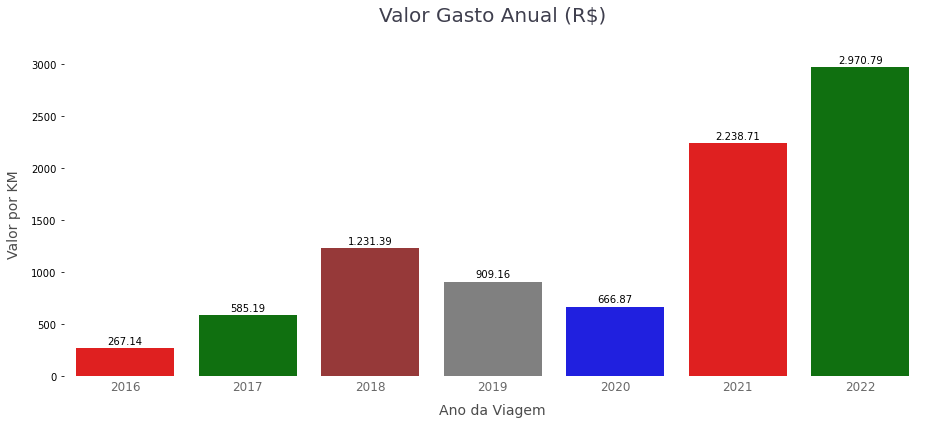

In [29]:

eixo_x='AnoViagem'
eixo_y='VlrGastoComViagem'
baseDados = dfGastosAnual
tituloGrafico = 'Valor Gasto Anual (R$)'
descricaoEixoX = 'Ano da Viagem'
descricaoEixoY = 'Valor por KM'
variacao = 40

geraGrafico(baseDados, eixo_x, eixo_y, tituloGrafico, descricaoEixoX, descricaoEixoY,variacao)


In [30]:
dfMediaGastosMensal = dfGastos[['AnoViagem','VlrMedioComViagem']]

dfMediaGastosMensal

,AnoViagem,VlrMedioComViagem
0,2016,16.696250
1,2017,20.899643
2,2018,18.108676
3,2019,13.176232
4,2020,27.786250
5,2021,21.119906
6,2022,21.527464


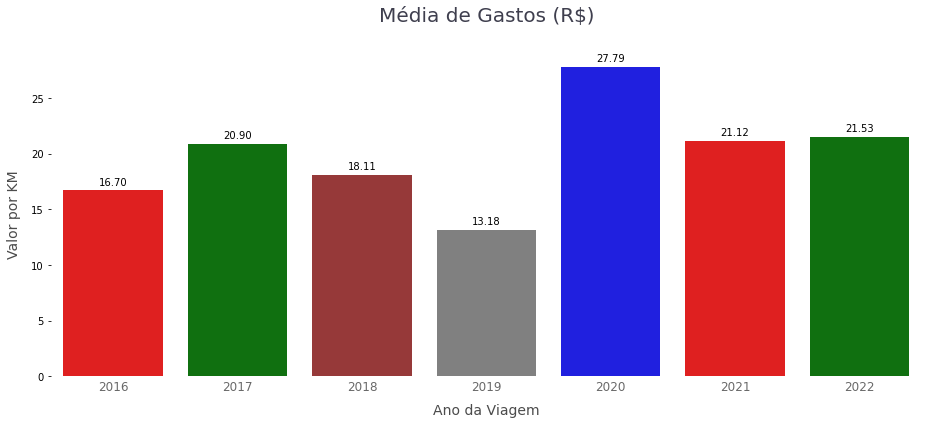

In [31]:

eixo_x='AnoViagem'
eixo_y='VlrMedioComViagem'
baseDados = dfMediaGastosMensal
tituloGrafico = 'Média de Gastos (R$)'
descricaoEixoX = 'Ano da Viagem'
descricaoEixoY = 'Valor por KM'
variacao = 0.5

geraGrafico(baseDados, eixo_x, eixo_y, tituloGrafico, descricaoEixoX, descricaoEixoY,variacao)



In [32]:
dfDadosViagens[dfDadosViagens['StatusViagem']=='Concluída'] \
            .groupby(['AnoViagem','MesViagem'], as_index=False) \
            .agg(NumTotalViagem=('ValorPago','count'),
                VlrGastoComViagem=('ValorPago','sum'),
                VlrMedioComViagem=('ValorPago','mean')).head(2)

,AnoViagem,MesViagem,NumTotalViagem,VlrGastoComViagem,VlrMedioComViagem
0,2016,04,3,87.38,29.126667
1,2016,05,4,60.16,15.040000


### 1.6 - Qual o valor pago por KM

In [33]:
dfGastosPorKM = dfDadosViagens.groupby('AnoViagem',as_index=False).agg(QtdKMPercorrido=('DistanciaPercorridaEmMilhas','sum')
                                       ,VlrGastoPorAno=('ValorPago','sum'))


dfGastosPorKM['ValorKM'] = round(dfGastosPorKM['VlrGastoPorAno']/dfGastosPorKM['QtdKMPercorrido'],2)

dfGastosPorKM.drop(columns=['QtdKMPercorrido'
                             , 'VlrGastoPorAno'], inplace=True)

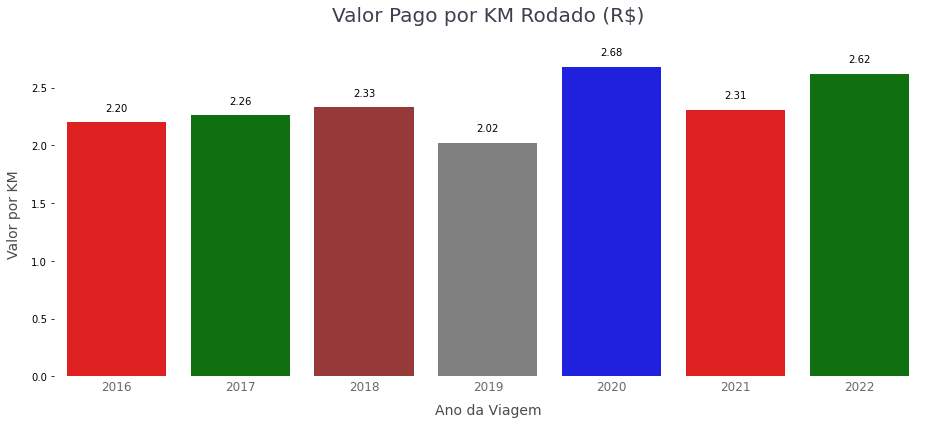

In [34]:
eixo_x='AnoViagem'
eixo_y='ValorKM'
baseDados = dfGastosPorKM
tituloGrafico = 'Valor Pago por KM Rodado (R$)'
descricaoEixoX = 'Ano da Viagem'
descricaoEixoY = 'Valor por KM'
variacao = 0.1

geraGrafico(baseDados, eixo_x, eixo_y, tituloGrafico, descricaoEixoX, descricaoEixoY,variacao)



### 1.7 - Qual dia da semana tem a maior utilização

In [35]:
dfSolicitacaoSemanal = dfDadosViagens.groupby(['DiaDaSemana','StatusViagem'],as_index=False) \
                    .agg(TotalSolicitacao=('DiaDaSemana','count')) \
                    .sort_values(by=['DiaDaSemana'], ascending=True)

dfSolicitacaoSemanal.pivot(index=['StatusViagem']
                        , columns='DiaDaSemana'
                        , values="TotalSolicitacao").fillna(0).reset_index()

DiaDaSemana,StatusViagem,0 - Domingo,1 - Segunda-Feira,2 - Terça-Feira,3 - Quarta-Feira,4 - Quinta-Feira,5 - Sexta-Feira,6 - Sábado
0,Cancelada,16,13,11,16,15,13,23
1,Concluída,87,42,48,49,49,76,98


### 1.8 - Quantas solicitações viraram viagens?

In [36]:
dfSolicitacaoAtendidaCancelada = dfDadosViagens.groupby(['StatusViagem']
                                                        ,as_index=False) \
                                                        .agg(QtdSolicitacao=('StatusViagem','count'))

dfSolicitacaoAtendidaCancelada['Perc'] = round((dfSolicitacaoAtendidaCancelada['QtdSolicitacao'] 
                                                / dfSolicitacaoAtendidaCancelada['QtdSolicitacao'].sum()) * 100,3)

dfSolicitacaoAtendidaCancelada.drop(columns=['QtdSolicitacao'], inplace=True)

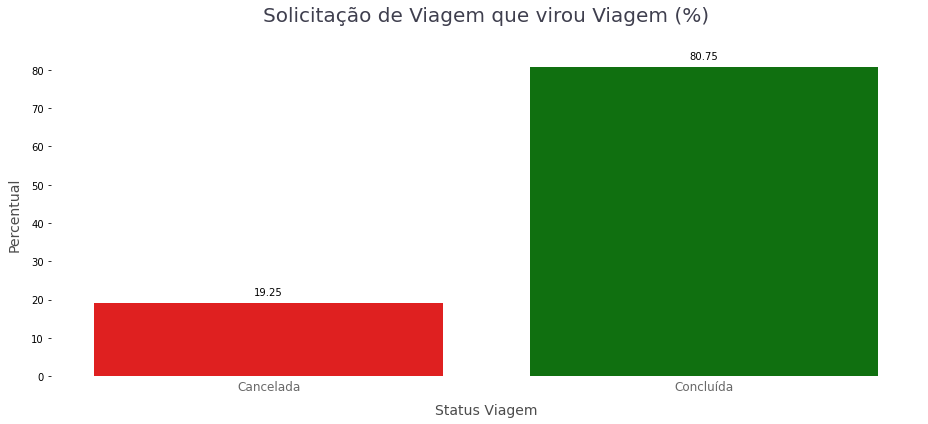

In [37]:

eixo_x='StatusViagem'
eixo_y='Perc'
baseDados = dfSolicitacaoAtendidaCancelada
tituloGrafico = 'Solicitação de Viagem que virou Viagem (%)'
descricaoEixoX = 'Status Viagem'
descricaoEixoY = 'Percentual'
variacao = 2

geraGrafico(baseDados, eixo_x, eixo_y, tituloGrafico, descricaoEixoX, descricaoEixoY,variacao)

